# Phishing Detection

## Introduction

This dataset consists of 247950 instances, of which 128541 are from phishing URLs and 119409 are from legitimate URLs.   It encompasses 41 features and 1 target variable (0=legitimate,1=phishing), making it suitable for implementing machine learning algorithms to identify phishing attacks. 

This is a classification problem (supervised learning) where the model has to predict the type of url as either 0 for legitimate url or 1 for phishing url.

## Data Visualization and Preprocessing

In [235]:
# import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler,EarlyStopping,TensorBoard,ReduceLROnPlateau

%matplotlib inline

In [121]:
df = pd.read_csv("Dataset.csv")
df.sample(5)

,Type,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,...,having_digits_in_subdomain,number_of_digits_in_subdomain,having_repeated_digits_in_subdomain,having_path,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
134497,1,75,2,0,3,10,1,0,6,0,...,1,2,1,0,4,0,0,0,4.318149,3.572469
128013,1,44,2,0,0,8,1,0,4,0,...,0,0,1,0,2,0,0,0,4.206718,3.852498
247658,0,41,2,0,0,6,0,0,3,0,...,0,0,1,0,1,0,0,0,4.201843,3.783465
237891,0,42,2,0,0,8,0,0,4,0,...,0,0,1,0,2,0,0,0,4.254831,3.366091
21695,0,47,3,0,0,10,0,0,5,0,...,0,0,1,0,3,0,0,0,4.102699,2.446439


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247950 entries, 0 to 247949
Data columns (total 42 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Type                                       247950 non-null  int64  
 1   url_length                                 247950 non-null  int64  
 2   number_of_dots_in_url                      247950 non-null  int64  
 3   having_repeated_digits_in_url              247950 non-null  int64  
 4   number_of_digits_in_url                    247950 non-null  int64  
 5   number_of_special_char_in_url              247950 non-null  int64  
 6   number_of_hyphens_in_url                   247950 non-null  int64  
 7   number_of_underline_in_url                 247950 non-null  int64  
 8   number_of_slash_in_url                     247950 non-null  int64  
 9   number_of_questionmark_in_url              247950 non-null  int64  
 10  number_o

In [7]:
df.describe()

,Type,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,...,having_digits_in_subdomain,number_of_digits_in_subdomain,having_repeated_digits_in_subdomain,having_path,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
count,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,...,247950.000000,247950.000000,247950.0,247950.0,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000
mean,0.481585,58.358197,2.894075,0.162351,4.366070,10.303218,0.600867,0.204049,4.784533,0.159911,...,0.064529,0.224013,1.0,0.0,2.606977,0.126501,0.002303,0.000944,4.257222,3.389839
std,0.499662,29.764620,1.690970,0.368773,9.579032,4.718381,1.235599,0.653502,1.812574,0.449506,...,0.245694,1.276447,0.0,0.0,1.636938,0.332414,0.047933,0.030706,0.328098,0.376361
min,0.000000,12.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,2.648939,1.386274
25%,0.000000,39.000000,2.000000,0.000000,0.000000,7.000000,0.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,1.0,0.0,2.000000,0.000000,0.000000,0.000000,4.038910,3.180833
50%,0.000000,49.000000,3.000000,0.000000,0.000000,9.000000,0.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,1.0,0.0,2.000000,0.000000,0.000000,0.000000,4.208298,3.392747
75%,1.000000,69.000000,3.000000,0.000000,4.000000,11.000000,1.000000,0.000000,5.000000,0.000000,...,0.000000,0.000000,1.0,0.0,3.000000,0.000000,0.000000,0.000000,4.428036,3.606937
max,1.000000,191.000000,28.000000,1.000000,144.000000,75.000000,23.000000,47.000000,30.000000,17.000000,...,1.000000,44.000000,1.0,0.0,28.000000,1.000000,1.000000,1.000000,5.866327,4.957323


### Obseravtions
1. The "Type" column is the target feature.
2. All features are already in numerical format so no encoding is required. There might be need for scaling to reduce the range of values of the features.
3. There are no missing values.

In [9]:
df["Type"].value_counts()

Type
0    128541
1    119409
Name: count, dtype: int64

In [10]:
df.columns

Index(['Type', 'url_length', 'number_of_dots_in_url',
       'having_repeated_digits_in_url', 'number_of_digits_in_url',
       'number_of_special_char_in_url', 'number_of_hyphens_in_url',
       'number_of_underline_in_url', 'number_of_slash_in_url',
       'number_of_questionmark_in_url', 'number_of_equal_in_url',
       'number_of_at_in_url', 'number_of_dollar_in_url',
       'number_of_exclamation_in_url', 'number_of_hashtag_in_url',
       'number_of_percent_in_url', 'domain_length', 'number_of_dots_in_domain',
       'number_of_hyphens_in_domain', 'having_special_characters_in_domain',
       'number_of_special_characters_in_domain', 'having_digits_in_domain',
       'number_of_digits_in_domain', 'having_repeated_digits_in_domain',
       'number_of_subdomains', 'having_dot_in_subdomain',
       'having_hyphen_in_subdomain', 'average_subdomain_length',
       'average_number_of_dots_in_subdomain',
       'average_number_of_hyphens_in_subdomain',
       'having_special_characters_

In [11]:
# visualise the distribution of URL type in the data
print(df["Type"].value_counts())
sns.countplot(data = df, x = "Type", color = "green");
plt.title("Distribution of URL Type");

Type
0    128541
1    119409
Name: count, dtype: int64


The ratio between the two target features is close showing that there will be less bias in the majority by the model.

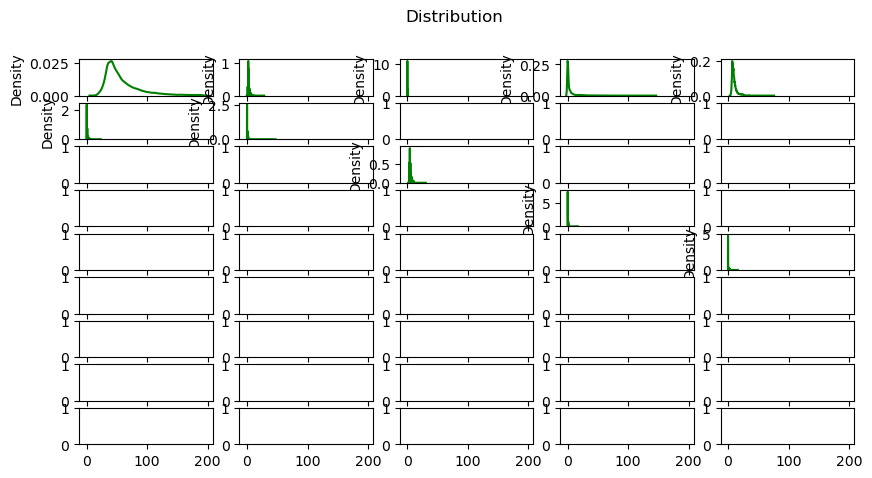

In [51]:
col_list = ['url_length', 'number_of_dots_in_url', 'having_repeated_digits_in_url', 'number_of_digits_in_url',
       'number_of_special_char_in_url', 'number_of_hyphens_in_url',
       'number_of_underline_in_url', 'number_of_slash_in_url',
       'number_of_questionmark_in_url', 'number_of_equal_in_url',
       'number_of_at_in_url', 'number_of_dollar_in_url',
       'number_of_exclamation_in_url', 'number_of_hashtag_in_url',
       'number_of_percent_in_url', 'domain_length', 'number_of_dots_in_domain',
       'number_of_hyphens_in_domain', 'having_special_characters_in_domain',
       'number_of_special_characters_in_domain', 'having_digits_in_domain',
       'number_of_digits_in_domain', 'having_repeated_digits_in_domain',
       'number_of_subdomains', 'having_dot_in_subdomain',
       'having_hyphen_in_subdomain', 'average_subdomain_length',
       'average_number_of_dots_in_subdomain',
       'average_number_of_hyphens_in_subdomain',
       'having_special_characters_in_subdomain',
       'number_of_special_characters_in_subdomain',
       'having_digits_in_subdomain', 'number_of_digits_in_subdomain',
       'having_repeated_digits_in_subdomain', 'having_path', 'path_length',
       'having_query', 'having_fragment', 'having_anchor', 'entropy_of_url',
       'entropy_of_domain']
fig, axes = plt.subplots(9, 5, sharex=True, figsize=(10,5))
sns.kdeplot(df[col_list[0]], ax=axes[0, 0], color ='green')
sns.kdeplot(df[col_list[1]], ax=axes[0, 1], color ='green')
sns.kdeplot(df[col_list[2]], ax=axes[0, 2], color ='green')
sns.kdeplot(df[col_list[3]], ax=axes[0, 3], color ='green')
sns.kdeplot(df[col_list[4]], ax=axes[0, 4], color ='green')
sns.kdeplot(df[col_list[5]], ax=axes[1, 0], color ='green')
sns.kdeplot(df[col_list[6]], ax=axes[1, 1], color ='green')
sns.kdeplot(df[col_list[7]], ax=axes[2, 2], color ='green')
sns.kdeplot(df[col_list[8]], ax=axes[3, 3], color ='green')
sns.kdeplot(df[col_list[9]], ax=axes[4, 4], color ='green')
fig.suptitle('Distribution')
plt.show()

# Feature Engineering

This is necessary for conventional ML models. Features that are correlated to each other will not be useful in predicting. Since I plan to use Deep learning as well, I will make a copy of the dataset as is and then perform feature engineering for the conventional ML models.

In [123]:
# data will be used for deep learning while df will be used for ML
data = df.copy()

In [57]:
X = df.drop("Type", axis = 1)
Y = df["Type"]

In [59]:
# select most relevant features
regressor = LinearRegression()
feature_selector = RFECV(regressor)

fit = feature_selector.fit(X,Y)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal numer of features: {optimal_feature_count}")

X_new = X.loc[:, feature_selector.get_support()]

Optimal numer of features: 37


In [60]:
X_new

,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_slash_in_url,number_of_questionmark_in_url,number_of_equal_in_url,number_of_at_in_url,number_of_dollar_in_url,...,having_special_characters_in_subdomain,number_of_special_characters_in_subdomain,having_digits_in_subdomain,number_of_digits_in_subdomain,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
0,2,0,0,8,0,5,0,0,0,0,...,1,3,0,0,3,0,0,0,4.010412,2.751629
1,5,0,0,12,0,6,0,0,0,0,...,1,3,0,0,4,0,0,0,4.089470,3.532573
2,2,0,6,8,0,3,1,1,0,0,...,1,3,0,0,1,1,0,0,4.386016,3.344698
3,2,0,0,7,0,4,0,0,0,0,...,1,3,0,0,2,0,0,0,4.221947,3.189898
4,3,0,0,9,0,5,0,0,0,0,...,1,3,0,0,3,0,0,0,4.103538,2.952820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247945,1,0,0,6,0,4,0,0,0,0,...,1,3,0,0,2,0,0,0,3.758289,3.323231
247946,2,0,0,8,0,5,0,0,0,0,...,1,3,0,0,3,0,0,0,3.937093,3.026987
247947,2,0,0,8,0,5,0,0,0,0,...,1,3,0,0,3,0,0,0,3.813207,3.327820
247948,1,1,19,9,0,7,0,0,0,0,...,1,3,0,0,5,0,0,0,4.540173,3.375000


In [247]:
# split the dataset -- training sub-dataset: 70%; sub-dataset:30%
test_size = 0.30

# seed for ramdomilization
seed = 42

# Split the dataset (both input & output) into training/testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=test_size, random_state=seed)

## Modelling

### 1. Logistic Regression

In [249]:
# build model
log_model = LogisticRegression()

# train model
log_model.fit(X_train, Y_train)

# predict
log_pred = log_model.predict(X_test)

# classification report
print(classification_report(Y_test,log_pred))

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.78      0.87      0.82     38569
           1       0.84      0.73      0.78     35816

    accuracy                           0.80     74385
   macro avg       0.81      0.80      0.80     74385
weighted avg       0.80      0.80      0.80     74385



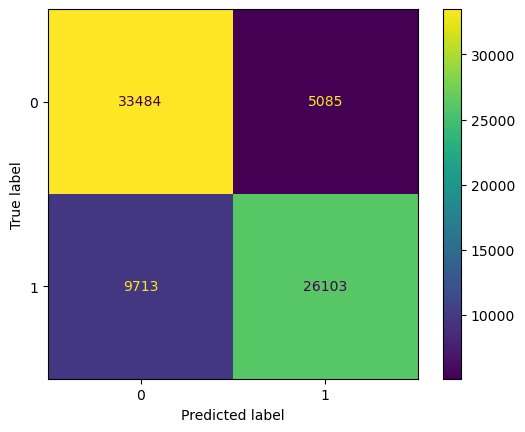

In [250]:
# plot confusion matrix
cm1 = confusion_matrix(Y_test,log_pred)
ConfusionMatrixDisplay(cm1).plot()
plt.show()

### 2. K-Nearest Neighbors

In [252]:
# Build the model
knn_model= KNeighborsClassifier(n_neighbors = 5)

# train model
knn_model.fit(X_train, Y_train)

# predict
knn_pred = knn_model.predict(X_test)

# classification report
print(classification_report(Y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     38569
           1       0.91      0.90      0.90     35816

    accuracy                           0.91     74385
   macro avg       0.91      0.91      0.91     74385
weighted avg       0.91      0.91      0.91     74385



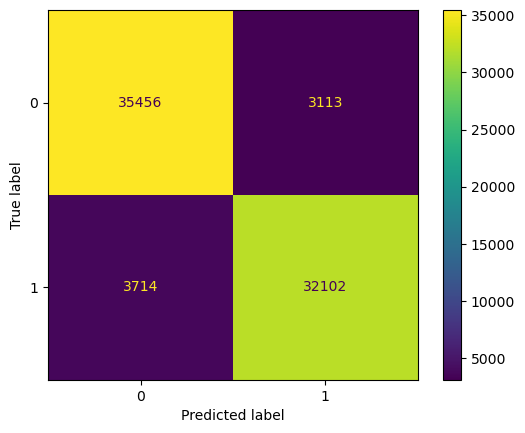

In [254]:
# plot confusion matrix
cm2 = confusion_matrix(Y_test,knn_pred)
ConfusionMatrixDisplay(cm2).plot()
plt.show()

### 3. Decision Tree Classifier

In [255]:
#build model
decision_model = DecisionTreeClassifier()

# train model
decision_model.fit(X_train, Y_train)

# Make Prediction & print the result
decision_pred = decision_model.predict(X_test)

print(classification_report(Y_test,decision_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     38569
           1       0.94      0.94      0.94     35816

    accuracy                           0.94     74385
   macro avg       0.94      0.94      0.94     74385
weighted avg       0.94      0.94      0.94     74385



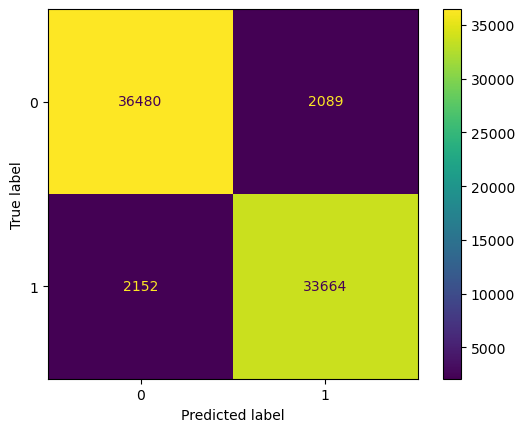

In [256]:
# plot confusion matrix
cm3 = confusion_matrix(Y_test,decision_pred)
ConfusionMatrixDisplay(cm3).plot()
plt.show()

### 4. Deep Learning

In [135]:
Y = data["Type"]
X = data.drop("Type", axis = 1)


In [149]:

# split the dataset -- training sub-dataset: 70%; sub-dataset:30%
test_size = 0.30

# seed for ramdomilization
seed = 42

# Split the dataset (both input & output) into training/testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [167]:
X_train.shape

(173565, 41)

In [295]:
model = Sequential()
model.add(LSTM(128, input_shape=(41,1)))
model.add(Dense(10, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))  # Example output layer for binary classification
model.compile(loss='CategoricalCrossentropy', optimizer='adam')
model.fit(X_train, Y_train, epochs=1, batch_size=64, verbose=1, validation_data = (X_test, Y_test)

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


2712/2712 ━━━━━━━━━━━━━━━━━━━━ 228s 83ms/step - loss: 0.0000e+00


In [301]:
loss, acc = model.evaluate(X_test,Y_test)
acc

2325/2325 ━━━━━━━━━━━━━━━━━━━━ 74s 32ms/step - loss: 0.0000e+00


TypeError: cannot unpack non-iterable float object

In [263]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                       │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,861 (265.08 KB)

 Trainable params: 67,861 (265.08 KB)

 Non-trainable params: 0 (0.00 B)

In [287]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
          optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
          metrics=['accuracy'])

In [289]:
learning_rate_reduce = ReduceLROnPlateau(monitor='accuracy', factor=0.7, patience=3, verbose=1, min_delta=1e-4, mode='min')
model_checkpoint = ModelCheckpoint('url.weights.h5', monitor='loss',verbose=1, save_best_only=True,save_weights_only=True)
model_EarlyStopping = EarlyStopping(monitor='loss', min_delta=0.0001, patience=7, verbose=0, mode='auto')